In [8]:
from PIL import Image
import numpy as np

Если библиотека PIL не импортируется, установите её с помощью команды ниже и перезапустите блокнот.

In [9]:
!pip install Pillow
# либо для одного текущего пользователя:
#!pip install --user Pillow


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Загрузите картинку с помощью команды open. Если необходимо, можете изменить размер картинки с помощью метода resize.

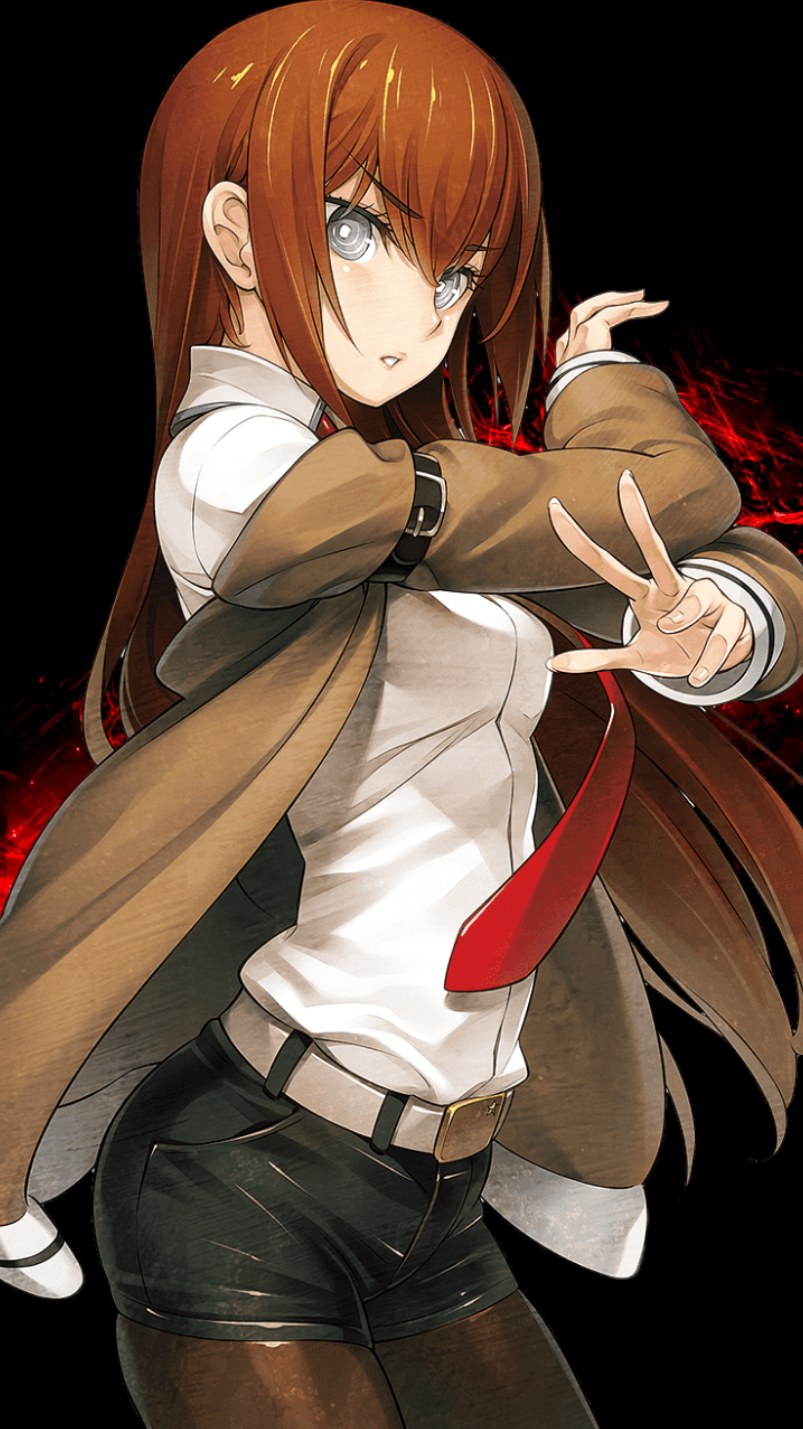

In [11]:
img = Image.open('makise_kurisu.png')#.resize(())
img

Преобразуйте картинку из объекта класса PIL в Numpy массив.

In [12]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [13]:
x.shape

(1429, 803, 4)

Видно, что исходная цветная картинка содержит три канала - RGB. Преобразуем её в одноканальную либо с помощью специальной функции rgb2gray либо обычным усреднением по трём каналам.

In [14]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

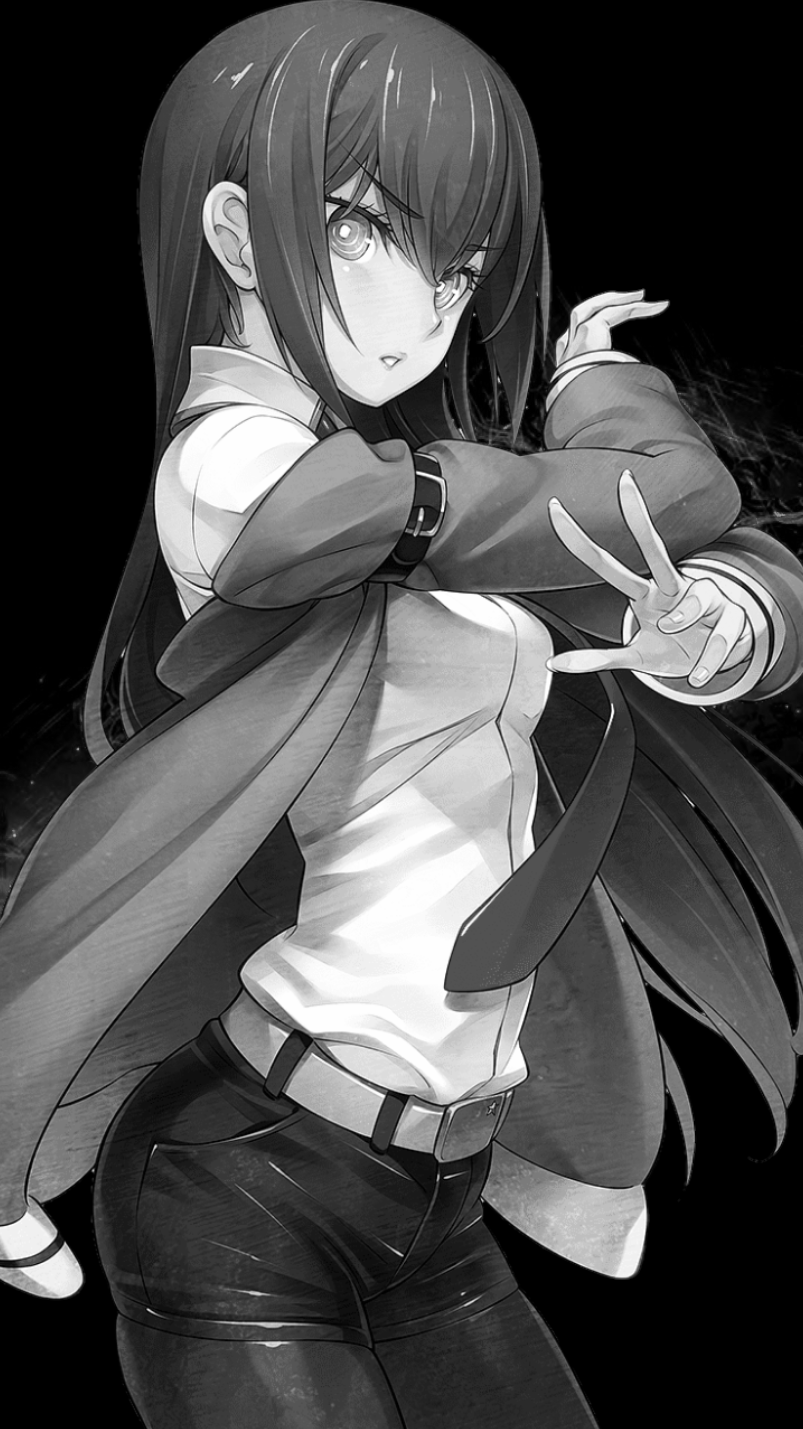

In [15]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

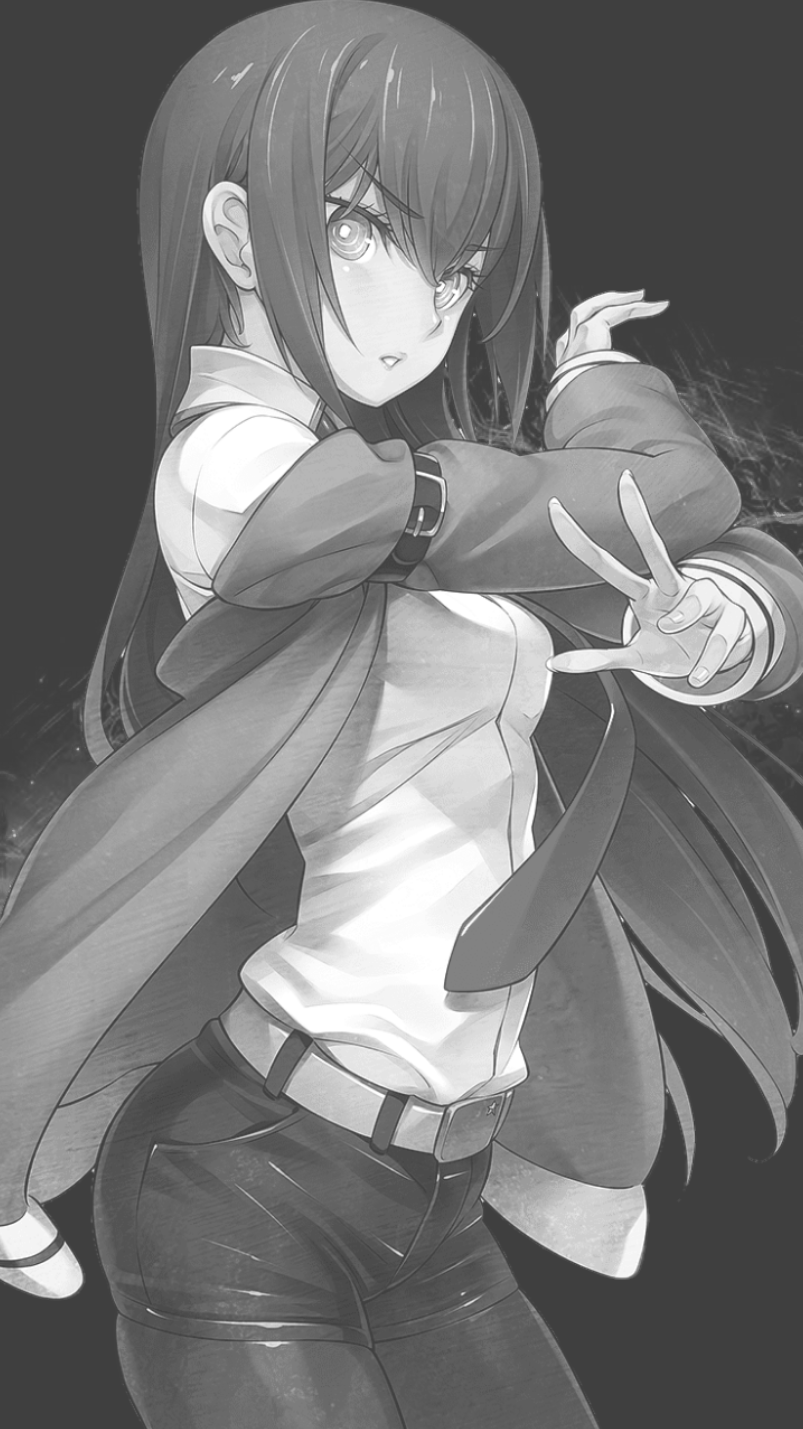

In [16]:
Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))

Дальше будем работать с одноканальной картинкой, т.е. двумерной матрицей.

In [17]:
#y = rgb2gray(x)
y = x.mean(axis=2)
y

array([[63.75, 63.75, 63.75, ..., 63.75, 63.75, 63.75],
       [63.75, 63.75, 63.75, ..., 63.75, 63.75, 63.75],
       [63.75, 63.75, 63.75, ..., 63.75, 63.75, 63.75],
       ...,
       [63.75, 63.75, 63.75, ..., 63.75, 63.75, 63.75],
       [63.75, 63.75, 63.75, ..., 63.75, 63.75, 63.75],
       [63.75, 63.75, 63.75, ..., 63.75, 63.75, 63.75]], dtype=float32)

In [11]:
y.shape

(525, 700)

Сделаем SVD разложение

In [19]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [20]:
U.shape

(1429, 803)

In [21]:
V.shape

(803, 803)

Проверим что разложение корректное, соберём его обратно, перемножив матрицы

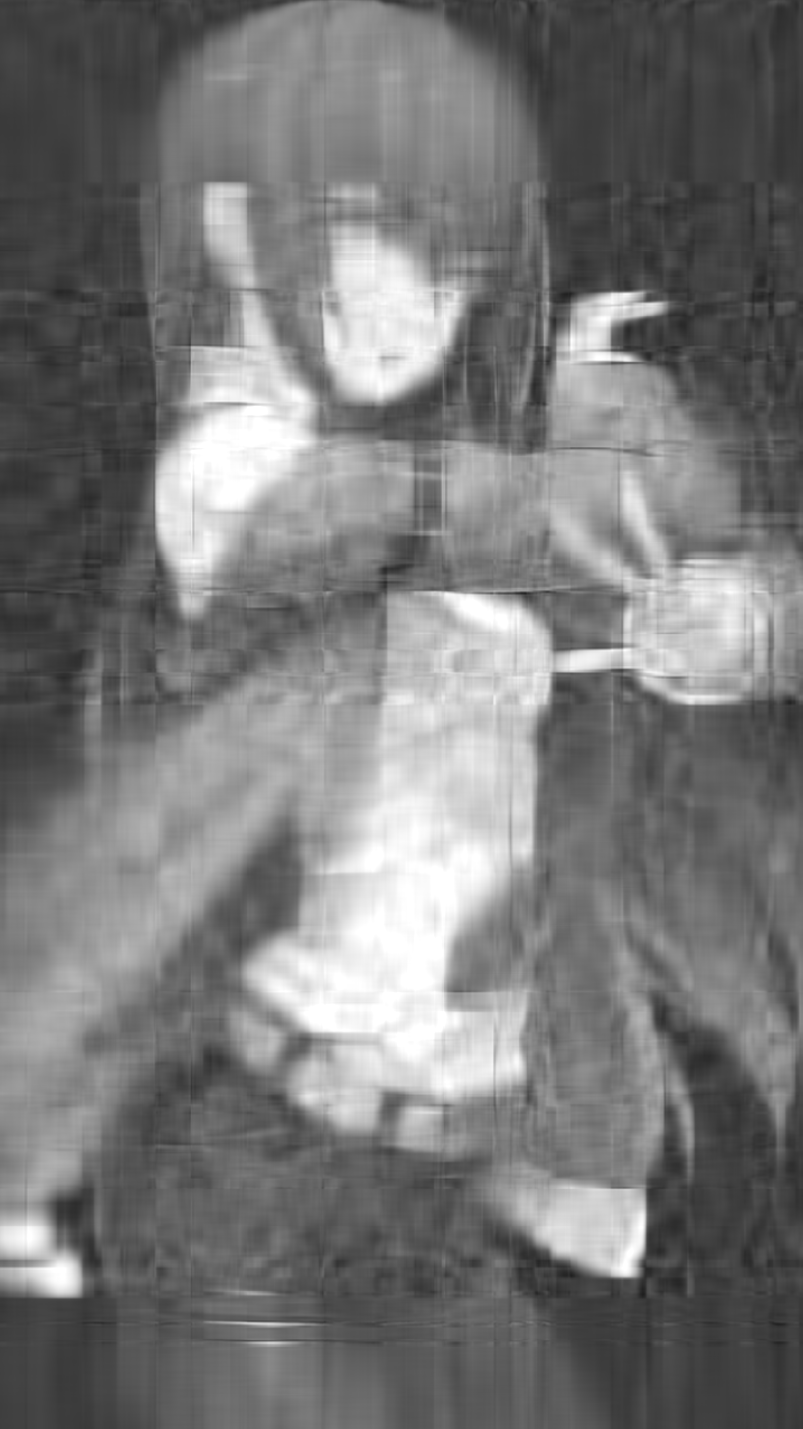

In [62]:
r = 20
Y_r = U[:,:r].dot(np.diag(S[:r])).dot(V[:r,:])
Y_r[Y_r > 255] = 255
Y_r[Y_r < 0] = 0
Image.fromarray(np.asarray(Y_r, dtype=np.uint8))

PIL объект можно при необходимости сохранить в файл на диск

In [63]:
Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'rank20.png')

**Задание для самостоятельной работы:**  
1. Рассмотреть малоранговые разложения
2. Получить картинки для разного значения ранга
3. Сохранить несколько картинок на диск
4. Сделать выводы

**Подсказки:**  
Не забудьте при преобразовании Numpy массива в объект PIL преобразовывать тип элементов в np.uint8.  
Если число находится вне диапазона [0, 255], сделайте клиппирование - все числа больше 255 приравняйте числу 255, все отрицательные числа сделайте равными нулю.